In [ ]:
import numpy as np

#from tqdm.auto import tqdm
#for i in tqdm(range(1000001)):
#  print(" ", end='\b')

def MLP(entrada, saida):
    w = np.random.random([1, 6])
    erro = 0.01
    epoca = 0
    a = 0.1
    e = 1
    while erro <= e and epoca <= 10:
        for i in range(len(entrada - 1)):
            net11 = np.sum(entrada[i, 0] * w[0, 0]) + np.sum(entrada[i, 1] * w[0, 2])
            net12 = np.sum(entrada[i, 0] * w[0, 1]) + np.sum(entrada[i, 1] * w[0, 3])
            y11 = 1 / (1 + np.exp(-net11))
            y12 = 1 / (1 + np.exp(-net12))
            net2 = np.sum(y11 * w[0, 4]) + np.sum(y12 * w[0, 5])
            y2 = 1 / (1 + np.exp(-net2))
            e = saida[i] - y2
            s2 = y2 * (1 - y2) * e

            #calculo da sensibilidade

            s11 = y11 * (1 - y11) * w[0, 4] * s2
            s12 = y12 * (1 - y12) * w[0, 5] * s2

            #ajustes de peso
            w = np.array([[(w[0, 0] + (a * s11 * entrada[i, 0])),
                           (w[0, 1] + (a * s12 * entrada[i, 0])),
                           (w[0, 2] + (a * s11 * entrada[i, 1])),
                           (w[0, 3] + (a * s12 * entrada[i, 1])),
                           (w[0, 4] + (a * s2 * y11)),
                           (w[0, 5] + (a * s2 * y12))]])
    if erro <= 0.01 and epoca < 10:
        print("Rede Treinada com Sucesso em ", epoca, "epocas")
        print("O vetor de peso eh: ", w)
    else:
        print("Error", erro)



entrada = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
saida = np.array([[0], [1], [1], [0]])
MLP(entrada, saida)


Rede Treinada com Sucesso em  0 epocas
O vetor de peso eh:  [[[0.19089744]
  [0.27317378]
  [0.29807073]
  [0.09325476]
  [0.57660384]
  [0.37263745]]]


In [ ]:
#MLP usando sklearn
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['Comprimento_sepal','Largura_sepal','Comprimento_petala','Largura_petala','Classificacao']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
y = dataset['Classificacao']
x = dataset.drop(['Classificacao'], axis=1)

y=pd.get_dummies(y)
#print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#convertendo para float 32bit
# x_train = np.array(x_train).astype(np.float32)
# print(x_train)
# x_test  = np.array(x_test).astype(np.float32)
# y_train = np.array(y_train).astype(np.float32)
# y_test  = np.array(y_test).astype(np.float32)

#print data para validação
# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)


#inicialização - Minha rede tera 4 entradas, 1º camada 10 neuronios, 2º camada 5 neuronios, saida com 3 neurios
Model = MLPClassifier(hidden_layer_sizes=(10,5), activation='tanh',max_iter=2000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) # verbode=0 to tirar log
#train
h = Model.fit(x_train,y_train)

y_pred=Model.predict(x_test)

#agora vou utilizar as funções de classificação estatística

print(classification_report(y_test,y_pred)) # Print 
#print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
print('O acerto foi de: ',accuracy_score(y_pred,y_test)) # Print accuracy score

#plot

# plt.plot(h.loss_curve_)
# plt.title('Historico de Erro')
# plt.xlabel('Epocas')
# plt.legend(['Erro'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.89      0.94        19
           2       0.87      1.00      0.93        13

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.96      0.96      0.96        45

O acerto foi de:  0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#MLP usando sklearn
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['Comprimento_sepal','Largura_sepal','Comprimento_petala','Largura_petala','Classificacao']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
y = dataset['Classificacao']
x = dataset.drop(['Classificacao'], axis=1)

y=pd.get_dummies(y)
print(y)

     Iris-setosa  Iris-versicolor  Iris-virginica
0              1                0               0
1              1                0               0
2              1                0               0
3              1                0               0
4              1                0               0
..           ...              ...             ...
145            0                0               1
146            0                0               1
147            0                0               1
148            0                0               1
149            0                0               1

[150 rows x 3 columns]


In [ ]:
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['Comprimento_sepal','Largura_sepal','Comprimento_petala','Largura_petala','Classificacao']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.head()
y = dataset['Classificacao']
y=pd.get_dummies(y)
print(y)


     Iris-setosa  Iris-versicolor  Iris-virginica
0              1                0               0
1              1                0               0
2              1                0               0
3              1                0               0
4              1                0               0
..           ...              ...             ...
145            0                0               1
146            0                0               1
147            0                0               1
148            0                0               1
149            0                0               1

[150 rows x 3 columns]


In [ ]:
#### Normalização ####
a = np.array([[1,2,3,4,5], [3,4,5,6,7]])
x= (a - np.min(a))/(np.max(a)-np.min(a))
print(x)

In [ ]:
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['Comprimento_sepal','Largura_sepal','Comprimento_petala','Largura_petala','Classificacao']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
df = dataset.drop(['Classificacao'], axis=1)
print(dataset.describe())
dataset.head()
y = dataset['Classificacao']
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)
kmeans.labels_

       Comprimento_sepal  Largura_sepal  Comprimento_petala  Largura_petala
count         150.000000     150.000000          150.000000      150.000000
mean            5.843333       3.054000            3.758667        1.198667
std             0.828066       0.433594            1.764420        0.763161
min             4.300000       2.000000            1.000000        0.100000
25%             5.100000       2.800000            1.600000        0.300000
50%             5.800000       3.000000            4.350000        1.300000
75%             6.400000       3.300000            5.100000        1.800000
max             7.900000       4.400000            6.900000        2.500000


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

     Comprimento_sepal  Largura_sepal  ...   Classificacao  Resultado
0                  5.1            3.5  ...     Iris-setosa          1
1                  4.9            3.0  ...     Iris-setosa          1
2                  4.7            3.2  ...     Iris-setosa          1
3                  4.6            3.1  ...     Iris-setosa          1
4                  5.0            3.6  ...     Iris-setosa          1
..                 ...            ...  ...             ...        ...
145                6.7            3.0  ...  Iris-virginica          0
146                6.3            2.5  ...  Iris-virginica          2
147                6.5            3.0  ...  Iris-virginica          0
148                6.2            3.4  ...  Iris-virginica          0
149                5.9            3.0  ...  Iris-virginica          2

[150 rows x 6 columns]


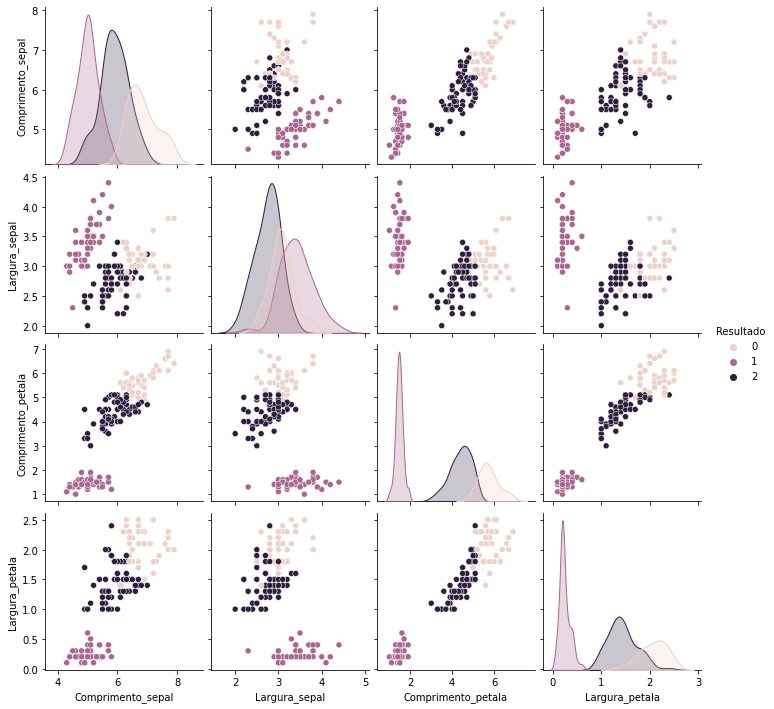

In [ ]:
dataset["Resultado"] = kmeans.labels_
print(dataset)
sb.pairplot(dataset, hue="Resultado")